## ENDOSCOPIC IMAGE CLASSIFICATION USING CONVOLUTIONAL NEURAL NETWORK

The Kvasir dataset is a comprehensive collection of medically annotated images, meticulously validated by expert endoscopists. It encompasses various categories that depict anatomical landmarks, pathological conditions, and endoscopic procedures within the gastrointestinal (GI) tract. Each category contains hundreds of images, making the dataset robust and versatile for multiple applications, including image retrieval, machine learning, deep learning, and transfer learning. Key anatomical landmarks featured in the dataset include the Z-line, pylorus, and cecum, while pathological findings cover conditions such as esophagitis, polyps, and ulcerative colitis. The dataset also includes specific image sets showcasing lesion removal processes, like "dyed and lifted polyp" and "dyed resection margins." Image resolutions vary from 720x576 to 1920x1072 pixels, and the organization of the dataset is meticulous, with images sorted into distinct folders named after their content. Notably, some image classes incorporate a green picture-in-picture display, which shows the position and configuration of the endoscope inside the bowel, using an electromagnetic imaging system (ScopeGuide, Olympus Europe). This feature aids in interpreting the images and is crucial for subsequent analyses, although it requires careful handling when detecting endoscopic findings.

## Citation for the Image kvasir Dataset

"""
@inproceedings{Pogorelov:2017:KMI:3083187.3083212,
  title = {KVASIR: A Multi-Class Image Dataset for Computer Aided Gastrointestinal Disease Detection},
  author = {
     Pogorelov, Konstantin and Randel, Kristin Ranheim and Griwodz, Carsten and
     Eskeland, Sigrun Losada and de Lange, Thomas and Johansen, Dag and
     Spampinato, Concetto and Dang-Nguyen, Duc-Tien and Lux, Mathias and
     Schmidt, Peter Thelin and Riegler, Michael and Halvorsen, P{\aa}l
  },
  booktitle = {Proceedings of the 8th ACM on Multimedia Systems Conference},
  series = {MMSys'17},
  year = {2017},
  isbn = {978-1-4503-5002-0},
  location = {Taipei, Taiwan},
  pages = {164--169},
  numpages = {6},
  doi = {10.1145/3083187.3083212},
  acmid = {3083212},
  publisher = {ACM},
  address = {New York, NY, USA},
}
"""


## Terms of use
The use of the Kvasir dataset is restricted for research and educational purposes only. The use of the Kvasir dataset for other purposes including commercial purposes is forbidden without prior written permission. In all documents and papers that use or refer to the Kvasir dataset or report experimental results based on the Kvasir dataset, a reference to the dataset paper have to be included.

### Install the right dependencies in the Environment

In [7]:
!pip install opencv-python matplotlib

In [12]:
!pip list

Package                       Version
----------------------------- ------------
absl-py                       1.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.0
anaconda-project              0.11.1
annotated-types               0.5.0
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens    

In [1]:
import tensorflow as tf
import os

In [2]:
# List the physical devices TensorFlow can access
print("Physical devices:", tf.config.list_physical_devices())

# Specifically check for GPU availability in TensorFlow
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available.")
    for gpu in gpus:
        print("Device:", gpu.name)
else:
    print("GPU is not available; using CPU instead.")



Physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU is available.
Device: /physical_device:GPU:0


### Checking if Images Can be read

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt 

In [5]:
data_dir = 'data'

In [6]:
datalist =['esophagitis',
 'ulcerative-colitis']

In [7]:
#count how many images we have in each folder
for x in datalist:  
    length = len(os.listdir(os.path.join(data_dir,x)))
    print(f'{length} {x} images')

500 esophagitis images
500 ulcerative-colitis images


In [8]:
image_ext = ['jpeg','jpg','bmp','png']

In [9]:
#testing if the images can be read 
img = cv2.imread(os.path.join('data','esophagitis',
                              '0cbddd47-c7f6-474b-9e9a-b5d2429a2312.jpg'))

In [10]:
#(1072 pixels high, 1920 pixels wide , 3 channels indicates its a colored image)
img.shape

(1072, 1920, 3)

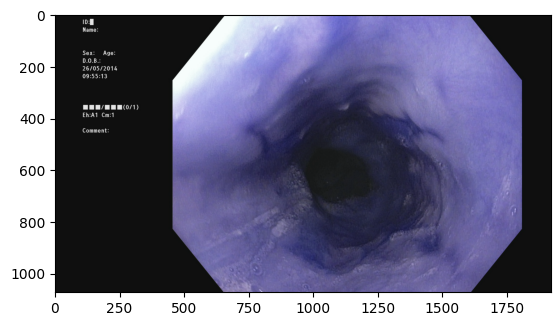

In [11]:
#OPENCV reads images as BGR 
#Matplotlib expects RGB
plt.imshow(img)
plt.show()

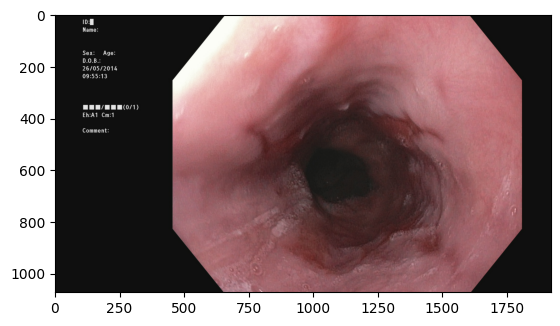

In [12]:
#FIXING THE COLOUR ISSUE USING CONVERSION 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

---------------

### LOAD DATASET FOR THE DEEP LEARNING MODEL BUILDING A PIPELINE

In [13]:
#Dataset API
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [14]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [15]:
import numpy as np

In [16]:
#lOAD DATA USING TENSORFLOW TO BUILD THE DATASET FOR US WITH LABELS, CLASSES AND SIZE RESIZING ETC 
#DATA IS ADDED AS A GENERATOR IT IS NOT LOADED TO MEMORY
#Building Data pipeline
data = tf.keras.utils.image_dataset_from_directory('Eso_UC_data')

Found 1000 files belonging to 2 classes.


2023-12-16 11:54:24.764058: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-16 11:54:24.764096: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-16 11:54:24.764101: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-16 11:54:24.764158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-16 11:54:24.764181: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
#Allowing us to acess to loop through
data_iterator = data.as_numpy_iterator()

In [18]:
#Allowing us to grab one batch back (32 images at a time)
batch = data_iterator.next()

In [19]:
#batches of 32 based on the pipeline setup to batch images 32 at a time and resize to 256x256
#Images represented as numpy Arrays
batch[0].shape

(32, 256, 256, 3)

In [20]:
#Batch labels for images (we have 5 labels)
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int32)

In [21]:
#Get names of the labels
class_names = data.class_names
print(class_names)

['esophagitis', 'ulcerative-colitis']


-------

-------

### 2 PREPROCESSING 

#### 2.1 Scaled Data (for a pipline) 

In [22]:
#Normalizing the image channels 3(RGB) Values(0-255)
#Essentially scales Image sizes
data  = data.map(lambda x,y : (x/255,y))

In [23]:
#check the next batch
new_batch = data.as_numpy_iterator().next()

In [24]:
new_batch[0].min()

0.0

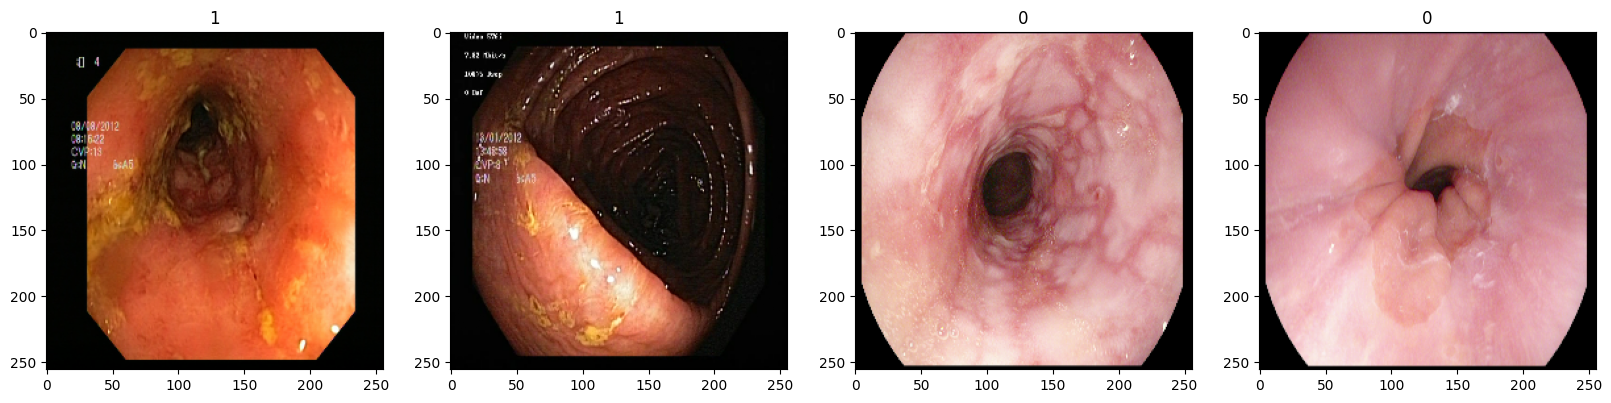

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(new_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(new_batch[1][idx])

#### 2.2 Split Data (Partion Data)

In [26]:
len(data)

32

In [27]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)
test_size = int(len(data)*.05)

In [28]:
train_size

25

In [29]:
val_size

6

In [30]:
test_size

1

In [31]:
# Shuffle the data with a seed for reproducibility
buffer_size = 1000  #should be the number of images in data
shuffled_data = data.shuffle(buffer_size, seed=42)

# Take subsets for training, validation, and testing
train = shuffled_data.take(train_size)
val = shuffled_data.skip(train_size).take(val_size)
test = shuffled_data.skip(train_size + val_size).take(test_size)

-----------

### 3. Deep Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### 3.1 We will be building a convolutionary neural network 

In [34]:
#Build Nueral Network
model = Sequential()
#layers in neural network  hidden layers
#for the convolution layer (x=number of filters, (a,b)= shape of filter),y= stride)
#this is what is called the architechture of the nueral network

#PS Lookup ImageNet image classification architechture

#three covoution blocks
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#We remove the channel values by flattening
model.add(Flatten())


#dense layers are fully connected layers for that single value to go into
model.add(Dense(256, activation='relu'))

#output layer using sigmoid because its a binary classification problem
model.add(Dense(1, activation='sigmoid'))

In [35]:
#Complile model using Categorical crossentropy as the loss and metric used is accuracy
model.compile('adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

#### 3.2 Insering a log for our Model to see how its Training

In [37]:
logdir='logs'

In [38]:
#To collect training performance history 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-12-16 11:54:47.654438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 13s 350ms/step - loss: 0.6943 - accuracy: 0.7371 - val_loss: 0.1286 - val_accuracy: 0.9688
Epoch 2/20
25/25 [==============================] - 11s 295ms/step - loss: 0.0405 - accuracy: 0.9845 - val_loss: 0.0345 - val_accuracy: 0.9844
Epoch 3/20
25/25 [==============================] - 13s 350ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.1080 - val_accuracy: 0.9740
Epoch 4/20
25/25 [==============================] - 11s 309ms/step - loss: 0.0336 - accuracy: 0.9897 - val_loss: 0.0161 - val_accuracy: 0.9948
Epoch 5/20
25/25 [==============================] - 11s 287ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 13s 348ms/step - loss: 0.0164 - accuracy: 0.9961 - val_loss: 0.0291 - val_accuracy: 0.9948
Epoch 7/20
25/25 [==============================] - 11s 294ms/step - loss: 0.0109 - accuracy: 0.9975 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 8/20

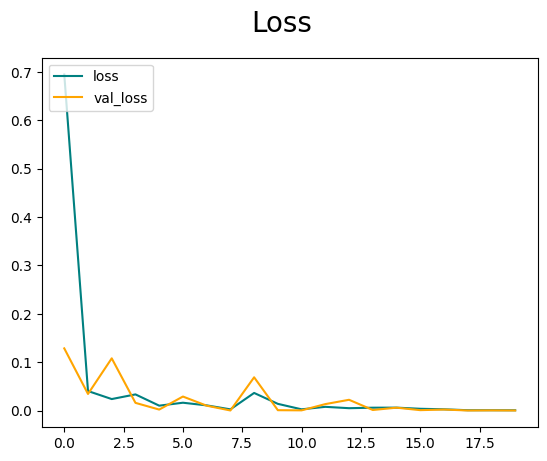

In [40]:
#Plot the validation loss and train loss on a line graph using history
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

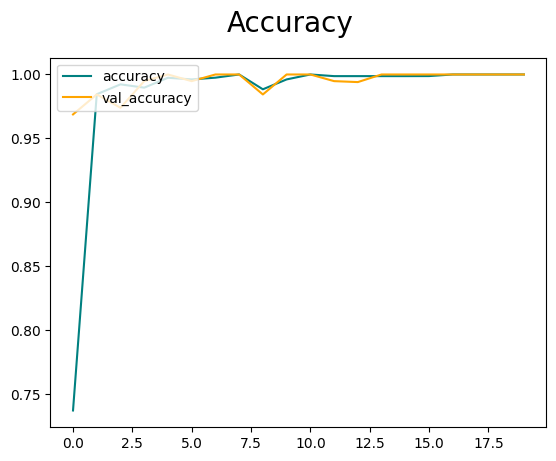

In [41]:
#Plot the validation accuracy and train accuracy on a line graph using history
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### Lets Try Early Stop to Prevent Overfitting 

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [44]:
#Build Nueral Network
model2 = Sequential()
#layers in neural network  hidden layers
#for the convolution layer (x=number of filters, (a,b)= shape of filter),y= stride)
#this is what is called the architechture of the nueral network

#PS Lookup ImageNet image classification architechture

#three covoution blocks
model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D())

model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Conv2D(16, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

#We remove the channel values by flattening
model2.add(Flatten())


#dense layers are fully connected layers for that single value to go into
model2.add(Dense(256, activation='relu'))

#output layer using sigmoid because its a binary classification problem
model2.add(Dense(1, activation='sigmoid'))

In [45]:
#Complile model using Categorical crossentropy as the loss and metric used is accuracy
model2.compile('adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
hist = model2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback,early_stop])

Epoch 1/20
25/25 [==============================] - 14s 344ms/step - loss: 0.9301 - accuracy: 0.8080 - val_loss: 0.0534 - val_accuracy: 1.0000
Epoch 2/20
25/25 [==============================] - 12s 338ms/step - loss: 0.0318 - accuracy: 0.9923 - val_loss: 0.0083 - val_accuracy: 0.9948
Epoch 3/20
25/25 [==============================] - 15s 377ms/step - loss: 0.0181 - accuracy: 0.9948 - val_loss: 0.0146 - val_accuracy: 0.9948
Epoch 4/20
25/25 [==============================] - 13s 342ms/step - loss: 0.0235 - accuracy: 0.9910 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 13s 334ms/step - loss: 0.0450 - accuracy: 0.9820 - val_loss: 0.0207 - val_accuracy: 0.9896
Epoch 6/20
25/25 [==============================] - 11s 301ms/step - loss: 0.0172 - accuracy: 0.9948 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 15s 405ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.2937e-04 - val_accuracy: 1.

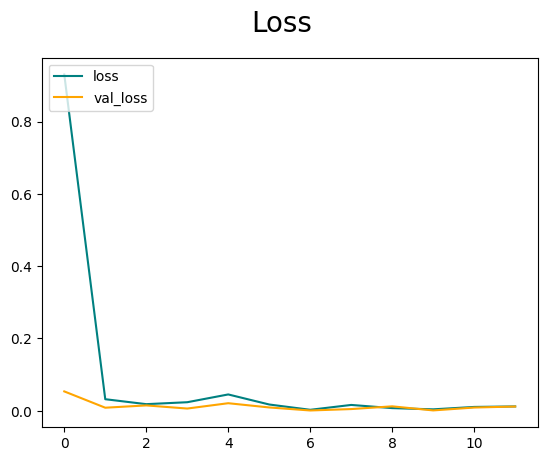

In [47]:
#Plot the validation loss and train loss on a line graph using history
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

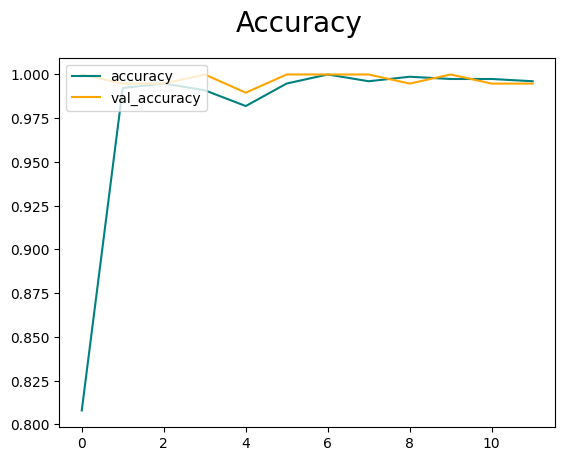

In [48]:
#Plot the validation accuracy and train accuracy on a line graph using history
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

-----------

### Evaluate Model and Model2 Performance on Test Data

In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
#Instatiating the metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [51]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 322ms/step


In [52]:
print(f"precision:{pre.result()}, recall: {re.result()} ,accuracy {acc.result()}")

precision:1.0, recall: 1.0 ,accuracy 1.0


In [53]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model2.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 87ms/step


In [54]:
print(f"precision:{pre.result()}, recall: {re.result()} ,accuracy {acc.result()}")

precision:1.0, recall: 1.0 ,accuracy 1.0


### Test Models

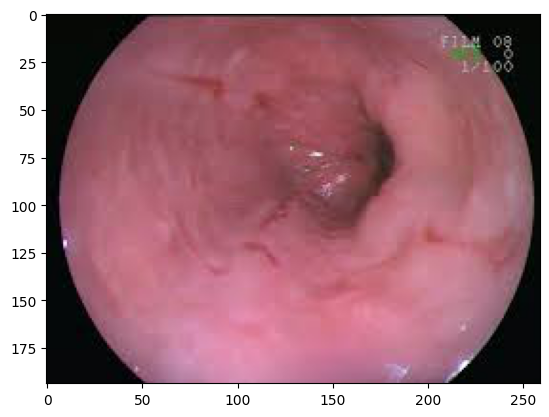

In [57]:
eso_test = cv2.imread('esophagitis_test.jpeg')
plt.imshow(cv2.cvtColor(eso_test,cv2.COLOR_BGR2RGB))
plt.show()

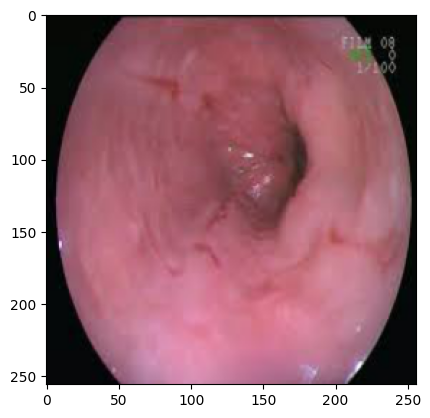

In [66]:
# Assuming eso_test is a BGR image
resize = tf.image.resize(eso_test, (256, 256))
resize = resize.numpy().astype('uint8')  # Convert to uint8

# Now perform the color conversion
converted_eso = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)

plt.imshow(converted_eso)
plt.show()

In [71]:
converted_image.shape

(256, 256, 3)

In [74]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [93]:
#Since Our model requires a batch of images to be passed through we have to 
#encapsulate the image in more arrays using numpy and dont forget it needs a scaled image

#ESOPHAGITIS == 0 
#UC == 1
ypred = model.predict(np.expand_dims((converted_eso/255), 0))

1/1 [==============================] - 0s 24ms/step


In [99]:
#Probability of classification from 0 - 1 so cut off beiing 50% 
if ypred > 0.5: 
    print(f'Predicted class is Ulcerative Colitis')
    print(f'probability:{ypred[0][0]}')
else:
    print(f'Predicted class is Esophagitis')
    print(f'probability:{ ypred[0][0]}')

Predicted class is Esophagitis
probability:4.349641676526517e-05


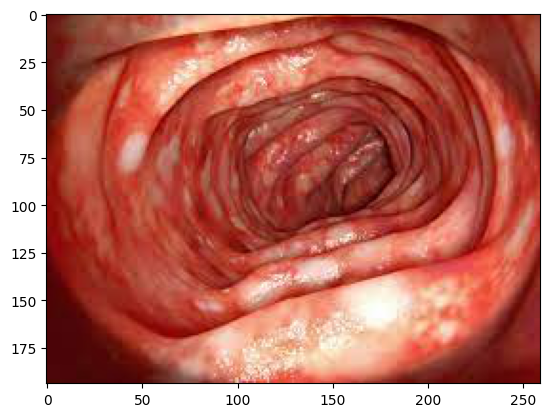

In [86]:
uc_test = cv2.imread('Ulcerative_colitis_test.jpeg')
plt.imshow(cv2.cvtColor(uc_test,cv2.COLOR_BGR2RGB))
plt.show()

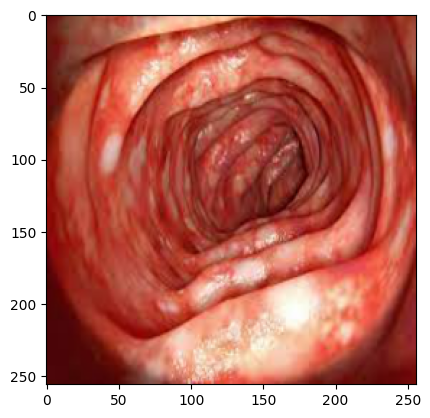

In [89]:
# Assuming uc_test is a BGR image
resize = tf.image.resize(uc_test, (256, 256))
resize = resize.numpy().astype('uint8')  # Convert to uint8

# Now perform the color conversion
converted_uc = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)

plt.imshow(converted_uc)
plt.show()

In [90]:
#prediction of our test UC Image
ypred = model.predict(np.expand_dims((converted_uc/255), 0))

1/1 [==============================] - 0s 28ms/step


In [91]:
#Probability of classification from 0 - 1 so cut off beiing 50% 
if ypred > 0.5: 
    print(f'Predicted class is Ulcerative Colitis')
    print(f'probability:{ypred[0][0]}')
else:
    print(f'Predicted class is Esophagitis')
    print(f'probability:{ypred[0][0]}')

Predicted class is Ulcerative Colitis
probability:[[0.9999925]]


### Save Model

In [100]:
from tensorflow.keras.models import load_model

In [101]:
#Serializing the model (similar to ziping data)
model.save(os.path.join('models','Esophagitis_UC_Classifier.h5'))

/Users/obinnadinneya/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Reloading the Model to Run Another test

In [103]:
new_model = load_model('models/Esophagitis_UC_Classifier.h5')

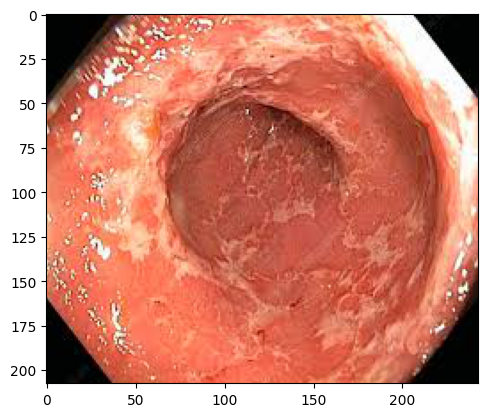

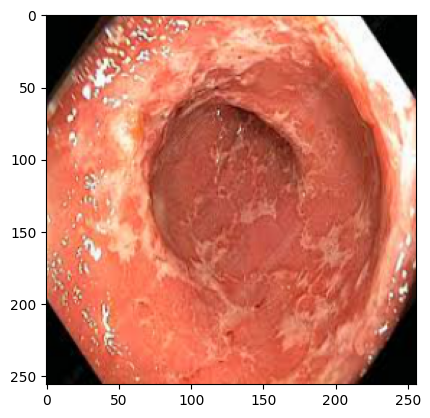

In [104]:
uc_test = cv2.imread('UCtest2.jpeg')
plt.imshow(cv2.cvtColor(uc_test,cv2.COLOR_BGR2RGB))
plt.show()

# Assuming uc_test is a BGR image
resize = tf.image.resize(uc_test, (256, 256))
resize = resize.numpy().astype('uint8')  # Convert to uint8

# Now perform the color conversion
converted_uc = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)

plt.imshow(converted_uc)
plt.show()

In [107]:
ypred = new_model.predict(np.expand_dims(converted_uc/255, 0))

1/1 [==============================] - 0s 24ms/step


In [108]:
#Probability of classification from 0 - 1 so cut off beiing 50% 
if ypred > 0.5: 
    print(f'Predicted class is Ulcerative Colitis')
    print(f'probability:{ypred[0][0]}')
else:
    print(f'Predicted class is Esophagitis')
    print(f'probability:{ypred[0][0]}')

Predicted class is Ulcerative Colitis
probability:0.997900128364563


In [ ]:
###Conclusiion 